In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as data
import yfinance as yf

In [4]:
start = '2010-01-01'
end = '2023-7-30'

df =yf.download('NVDA',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,4.6775,4.7375,4.6650,4.6700,4.284380,70034000
2010-01-04,4.6275,4.6550,4.5275,4.6225,4.240800,80020400
2010-01-05,4.6050,4.7400,4.6050,4.6900,4.302727,72864800
2010-01-06,4.6875,4.7300,4.6425,4.7200,4.330250,64916800
2010-01-07,4.6950,4.7150,4.5925,4.6275,4.245388,54779200


In [5]:
df.shape

(3416, 6)

In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-24,447.309998,451.089996,440.399994,446.119995,446.083252,38251600
2023-07-25,449.410004,461.829987,449.230011,456.790009,456.752380,34808100
2023-07-26,460.209991,460.529999,446.299988,454.519989,454.482544,36423700
2023-07-27,465.190002,473.950012,457.500000,459.000000,458.962189,45597600
2023-07-28,466.679993,470.269989,463.809998,467.500000,467.461487,33119400


In [7]:
df= df.reset_index()

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,4.677500,4.737500,4.665000,4.670000,4.284380,70034000
1,2010-01-04,4.627500,4.655000,4.527500,4.622500,4.240800,80020400
2,2010-01-05,4.605000,4.740000,4.605000,4.690000,4.302727,72864800
3,2010-01-06,4.687500,4.730000,4.642500,4.720000,4.330250,64916800
4,2010-01-07,4.695000,4.715000,4.592500,4.627500,4.245388,54779200
...,...,...,...,...,...,...,...
3411,2023-07-24,447.309998,451.089996,440.399994,446.119995,446.083252,38251600
3412,2023-07-25,449.410004,461.829987,449.230011,456.790009,456.752380,34808100
3413,2023-07-26,460.209991,460.529999,446.299988,454.519989,454.482544,36423700
3414,2023-07-27,465.190002,473.950012,457.500000,459.000000,458.962189,45597600


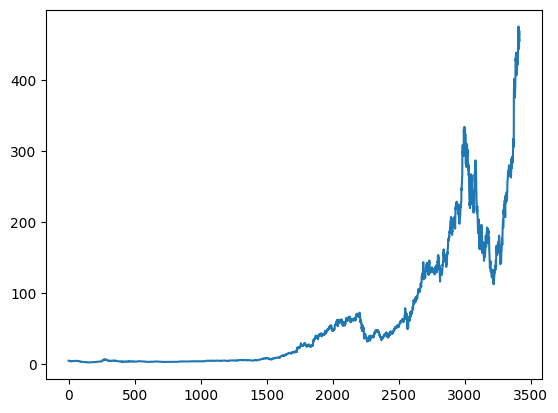

In [9]:
plt.plot(df['Close'])

In [10]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3411    330.0657
3412    332.3638
3413    334.5776
3414    336.7786
3415    339.0982
Name: Close, Length: 3416, dtype: float64


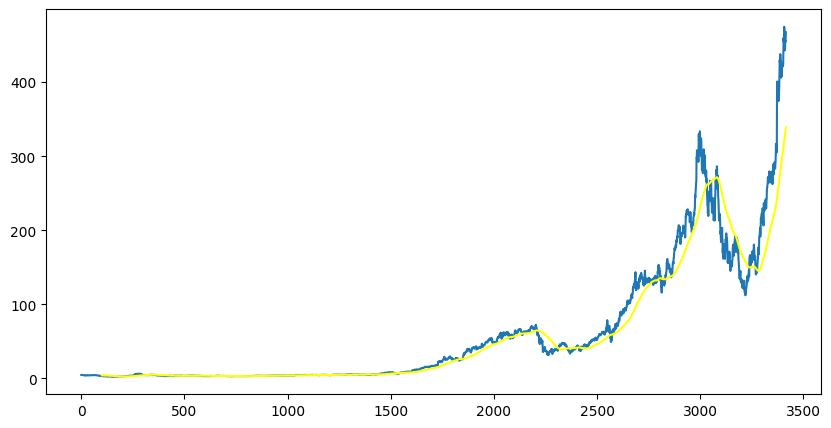

In [11]:
plt.figure(figsize= (10,5))
plt.plot(df.Close)
plt.plot(ma100 , color = 'yellow')
plt.show()

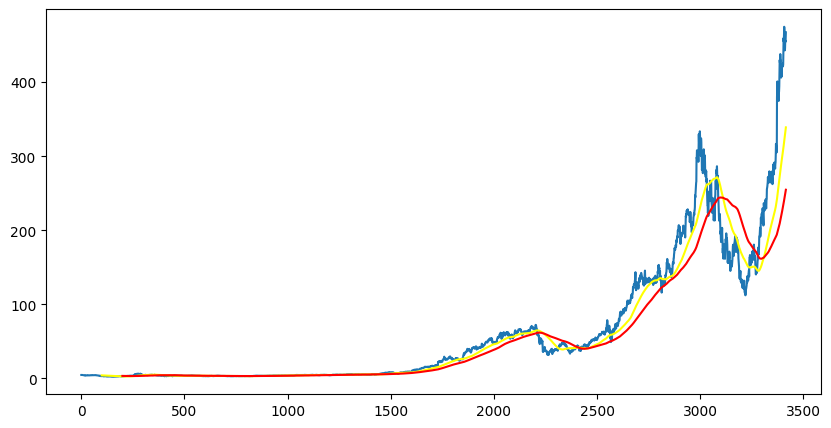

In [12]:
ma200= df.Close.rolling(200).mean()
plt.figure(figsize= (10,5))
plt.plot(df.Close)
plt.plot(ma100 , color = 'yellow')
plt.plot(ma200 , color = 'red')

plt.show()

In [13]:
#spltting data into train test 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(' taining ', data_training.shape)
print(' testing ', data_testing.shape)

 taining  (2391, 1)
 testing  (1025, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)

C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarn

In [18]:
data_training_array

array([[0.03494011],
       [0.03426269],
       [0.03522533],
       ...,
       [0.55387195],
       [0.56078867],
       [0.54674131]])

In [19]:
x_train = []
y_train = []

for i in range(100 ,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#ML model 
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50 )

Epoch 1/50
72/72 [==============================] - 15s 157ms/step - loss: 0.0236
Epoch 2/50
72/72 [==============================] - 11s 152ms/step - loss: 0.0046
Epoch 3/50
72/72 [==============================] - 11s 153ms/step - loss: 0.0040
Epoch 4/50
72/72 [==============================] - 11s 152ms/step - loss: 0.0050
Epoch 5/50
72/72 [==============================] - 11s 152ms/step - loss: 0.0046
Epoch 6/50
72/72 [==============================] - 11s 151ms/step - loss: 0.0046
Epoch 7/50
72/72 [==============================] - 11s 153ms/step - loss: 0.0033
Epoch 8/50
72/72 [==============================] - 12s 160ms/step - loss: 0.0031
Epoch 9/50
72/72 [==============================] - 12s 173ms/step - loss: 0.0040
Epoch 10/50
72/72 [==============================] - 12s 162ms/step - loss: 0.0034
Epoch 11/50
72/72 [==============================] - 11s 160ms/step - loss: 0.0032
Epoch 12/50
72/72 [==============================] - 12s 160ms/step - loss: 0.0035
Epoch 13/50
7

In [27]:
model.save('model.h5')

In [28]:
data_testing.head()

,Close
2391,40.687500
2392,40.057499
2393,39.302502
2394,39.327499
2395,40.014999


In [29]:
pass_100_days = data_training.tail(100)

In [30]:
final_df = pd.concat([pass_100_days, data_testing], ignore_index=True)

In [31]:
input_data = scaler.fit_transform(final_df)
input_data

C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\ALISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarn

array([[0.00814845],
       [0.00717449],
       [0.00984722],
       ...,
       [0.95374803],
       [0.9638954 ],
       [0.98314816]])

In [32]:
input_data.shape

(1125, 1)

In [33]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [34]:
x_test, y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1025, 100, 1)
(1025,)


In [35]:
y_predicted = model.predict(x_test)

33/33 [==============================] - 2s 50ms/step


In [36]:
y_predicted.shape

(1025, 1)

In [37]:
y_test

array([0.01640449, 0.01497752, 0.01326743, ..., 0.95374803, 0.9638954 ,
       0.98314816])

In [39]:
y_predicted

array([[0.01886141],
       [0.01905803],
       [0.01928914],
       ...,
       [0.8571297 ],
       [0.85791343],
       [0.8583742 ]], dtype=float32)

In [40]:
scaler.scale_

array([0.00226503])

In [42]:
scale_factor = 1/0.00226503
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

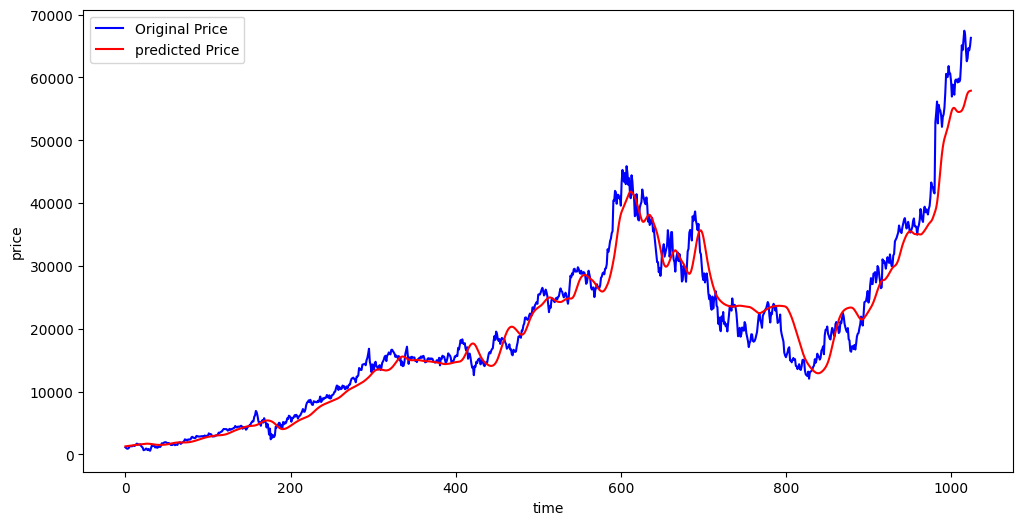

In [44]:
plt.figure(figsize= (12,6))
plt.plot(y_test , 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'predicted Price')

plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()